In [21]:
cd /home/edrewke/FHDeX/exec/immersed_boundary/flagellum/

/home/edrewke/FHDeX/exec/immersed_boundary/flagellum


In [1]:
import sys, os, os.path
import glob

import scipy as sp
import numpy as np

import matplotlib
import matplotlib.pyplot as pp

import yt
from yt.frontends.boxlib.data_structures import AMReXDataset

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.append("../src_analysis")
from data_model import *

In [4]:
data_root = "."
data_dir  = "."

In [5]:
data_path = os.path.join(data_root, data_dir)

In [6]:
n_fill   = 5
prefix   = "plt"
file_fmt = prefix + "{:0" + str(n_fill) + "d}"

In [7]:
data_glob  = os.path.join(data_path, prefix + "*")
data_files = glob.glob(data_glob)
data_files.sort()
#print(data_files)
len(data_files)

1151


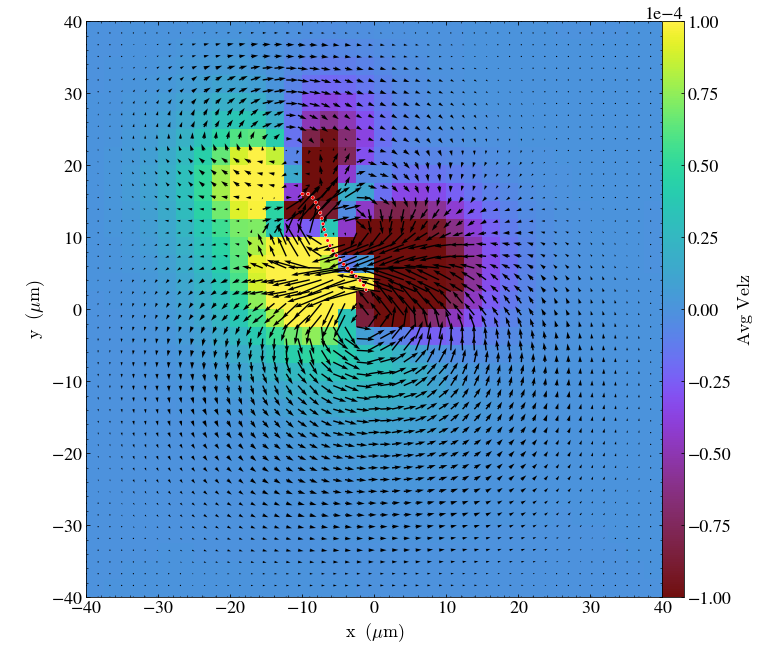

In [8]:
yt.funcs.mylog.setLevel(50)

n_marker_skip = 1
marker_rad = 2e-5
velz_max   = 1e-4
plot_index = -1

ds = yt.load(data_files[plot_index])

amrex_ds = AMReXDataset(data_files[plot_index])
ad = amrex_ds.all_data()
aos = AoS(ad)

slc = yt.SlicePlot(ds, "z", "avg_velz")

slc.set_log("avg_velx", False)
slc.set_log("avg_vely", False)
slc.set_log("avg_velz", False)
slc.set_zlim('avg_velz', -velz_max, velz_max)

slc.annotate_quiver("avg_velx", "avg_vely")

for j, part in enumerate(aos.particles[::n_marker_skip]):
    p = part.pos
    p.tolist()
    slc.annotate_sphere(p, radius=(marker_rad), circle_args={'fill':True, 'color':'white'})
    slc.annotate_sphere(p, radius=(marker_rad*0.7), circle_args={'fill':True, 'color':'red'})
    #slc.annotate_marker(p, plot_args={'color':'black'})

slc.show()

In [9]:
yt.funcs.mylog.setLevel(50)

for i, data_file in enumerate(data_files):
    frame_file = "frame_" + str(i).zfill(5) + ".png"

    if os.path.isfile(frame_file):
        continue
    else:
        print(f"Working on: {frame_file}")

    ds = yt.load(data_file)
    
    amrex_ds = AMReXDataset(data_file)
    ad = amrex_ds.all_data()
    aos = AoS(ad)
    
    n_marker_skip = 1
    marker_rad = 2e-5
    #velz_max   = 1e-4

    slc = yt.SlicePlot(ds, "z", "avg_velz")
    
    slc.set_log("avg_velx", False)
    slc.set_log("avg_vely", False)
    slc.set_log("avg_velz", False)
    slc.set_zlim('avg_velz', -velz_max, velz_max)
    
    slc.annotate_quiver("avg_velx", "avg_vely")
    
    for j, part in enumerate(aos.particles[::n_marker_skip]):
        p = part.pos
        p.tolist()
        slc.annotate_sphere(p, radius=(marker_rad), circle_args={'fill':True, 'color':'white'})
        slc.annotate_sphere(p, radius=(marker_rad*0.7), circle_args={'fill':True, 'color':'red'})
        #slc.annotate_marker(p,plot_args={'color':'black'})
    
    slc.save(frame_file)

In [677]:
yt.funcs.mylog.setLevel(50)

avg_pos_x = list()
avg_pos_y = list()

for i, data_file in enumerate(data_files[::5]):
    ds = yt.load(data_file)
    
    amrex_ds = AMReXDataset(data_file)
    ad = amrex_ds.all_data()
    aos = AoS(ad)
    
    p_x = 0
    p_y = 0
    n = 0
    
    for j, part in enumerate(aos.particles[::n_marker_skip]):
        p_x += part.pos[0]
        p_y += part.pos[1]
        n += 1

    avg_pos_x.append(p_x/n)
    avg_pos_y.append(p_y/n)

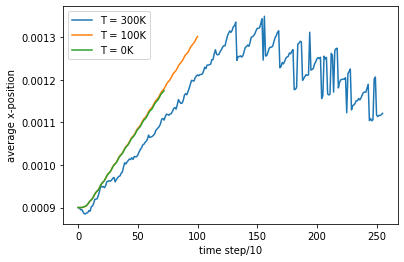

In [2061]:
plot(avg_pos_x, label = "T = 300K")
plot(avg_pos_x_highres_lofluct, label = "T = 100K")
plot(avg_pos_x_highres_nofluct, label = "T = 0K")

#plot(avg_pos_x_highres_sparse)
#plot(avg_pos_x_highres, label = "$\mathrm{d}x = h/2$")
#plot(avg_pos_x_lowres,  label = "$\mathrm{d}x = h$")
xlabel("time step/10")
ylabel("average x-position")
legend();

#savefig("xvst.pdf")

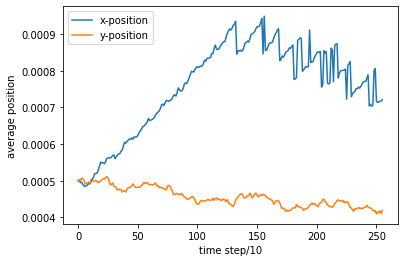

In [2062]:
plot(np.array(avg_pos_x)-0.0004, label = "x-position")
plot(np.array(avg_pos_y), label = "y-position")

xlabel("time step/10")
ylabel("average position")
#grid()
legend();

#savefig("xyvst.pdf")

In [1824]:
#avg_pos_x_highres_lofluct = avg_pos_x
#avg_pos_x_highres_nofluct = avg_pos_x
#avg_pos_x_highres_sparse = avg_pos_x
#avg_pos_x_highres_slow = avg_pos_x
#avg_pos_x_highres = avg_pos_x
#avg_pos_x_lowres = avg_pos_x

In [891]:
ds.field_list

[('boxlib', 'averaged_velx'),
 ('boxlib', 'averaged_vely'),
 ('boxlib', 'averaged_velz'),
 ('boxlib', 'divergence'),
 ('boxlib', 'pres'),
 ('boxlib', 'shifted_velx'),
 ('boxlib', 'shifted_vely'),
 ('boxlib', 'shifted_velz'),
 ('boxlib', 'tracer')]

In [31]:
ds.particle_field_by_type


AttributeError: 'BoxlibDataset' object has no attribute 'particle_field_by_type'

In [ ]:
ad = ds.all_data()
aos = AoS(ad)

In [ ]:
for i, part in enumerate(aos.particles):
    print(part.pos)

In [ ]:
p = aos.particles[1]


In [ ]:
p.annotate_sphere([0.5, 0.5, 0.5], radius=(2, 'kpc'),
                  circle_args={'color':'black'})

In [ ]:
p
